# Problem modeling

In [1]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

This is the discretized dataframe which we got by processeing the raw data earlier.

In [2]:
# Read data from csv file
df = pd.read_csv('data_discretized.csv')
df

,HomeTeamName,AwayTeamName,Result,HomeAverageGoals,AwayAverageGoals,Home5LastGames,Away5LastGames,Stage,City,Year
0,France,Yugoslavia,Lost,NoGamePlayed,NoGamePlayed,Neutral,Neutral,Semi-finals,Paris,1960
1,Czechoslovakia,Soviet Union,Lost,NoGamePlayed,NoGamePlayed,Neutral,Neutral,Semi-finals,Marseille,1960
2,Czechoslovakia,France,Won,Low,High,Bad,Bad,Third place play-off,Marseille,1960
3,Soviet Union,Yugoslavia,Won,High,High,Good,Good,Final,Paris,1960
4,Spain,Hungary,Won,NoGamePlayed,NoGamePlayed,Neutral,Neutral,Semi-finals,Madrid,1964
...,...,...,...,...,...,...,...,...,...,...
281,Germany,Italy,Draw,High,Mid,Good,Good,Quarter-finals,Bordeaux,2016
282,France,Iceland,Won,High,High,Good,Good,Quarter-finals,Saint-Denis,2016
283,Portugal,Wales,Won,Mid,High,Good,Good,Semi-finals,Décines-Charpieu,2016
284,Germany,France,Lost,Mid,High,Good,Good,Semi-finals,Marseille,2016


## (a)  Descriptive statistics

To perform some descriptive statistics, first, we write a function to count the results (won, lost, draw) of any give TeamName in the dataframe.

In [3]:
def countResult(name, df):
    won_count = 0
    lost_count = 0
    draw_count = 0
    for index, row in df.iterrows():
        if name in row['HomeTeamName']:
            if row['Result'] == 'Won':
                won_count += 1
            elif row['Result'] == 'Lost':
                lost_count += 1
            else:
                draw_count += 1
        elif name in row['AwayTeamName']:
            if row['Result'] == 'Lost':
                won_count += 1
            elif row['Result'] == 'Won':
                lost_count += 1
            else:
                draw_count += 1
    return won_count, lost_count, draw_count

Next, we write another function which returns a new dataframe contains the results of all teams.

In [4]:
def getResultAllTeam(df):
    # convert HomeTeamName and AwayTeamName to set to remove all duplicated names
    allTeamNames = list(df['HomeTeamName'])
    allTeamNames.extend(list(df['AwayTeamName']))
    allTeamNames = list(set(allTeamNames))
    
    # get results for each TeamName
    resultAllTeams = {}
    for name in allTeamNames:
        results = countResult(name, df)
        resultAllTeams[name] = results
        
    # rename columns    
    resultsDf = pd.DataFrame.from_dict(resultAllTeams, 'index')
    resultsDf = resultsDf.rename(columns={0: 'Won', 1: 'Lost', 2: 'Draw' })
    
    return resultsDf

the Won-Lost-Draw dataframe:

In [5]:
resultsDf = getResultAllTeam(df)
resultsDf

,Won,Lost,Draw
Russia,5,9,3
Sweden,5,9,6
FR Yugoslavia,1,2,1
France,20,10,9
Belgium,7,8,2
Spain,19,10,11
Latvia,0,2,1
Soviet Union,7,4,2
Denmark,7,14,6
Switzerland,2,6,5


Let's plot the total wins of all countries.

<AxesSubplot:>

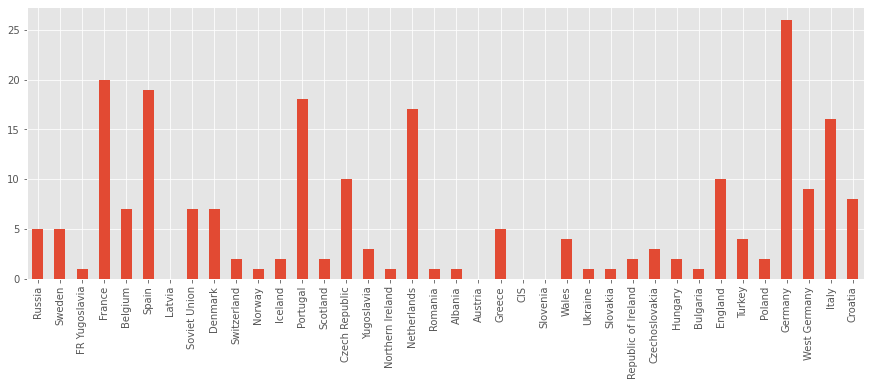

In [6]:
resultsDf['Won'].plot(kind='bar')

The bar graph shows that Germmany was the team having the most wins. Moreover, Spain, France, Netherlands, Italy and Portugal are also strong countries whose total wins were much higher compare to others.

## (b) Figure out the causalities between the features

Let's see what would happen if the host was France.

In [7]:
# These are cities in France.
dfFranceHost = df[(df['City'] == 'Paris') | 
             (df['City'] == 'Marseille') |
             (df['City'] == 'Lyon') |
             (df['City'] == 'Toulouse') |
             (df['City'] == 'Florence') |
             (df['City'] == 'Nice') |
             (df['City'] == 'Nantes') |
             (df['City'] == 'Strasbourg') |
             (df['City'] == 'Bordeaux') |
             (df['City'] == 'Saint-Étienne') |
             (df['City'] == 'Saint-Denis')]
resultAllTeamFranceHost = getResultAllTeam(dfFranceHost)
resultAllTeamFranceHost

,Won,Lost,Draw
Russia,0,1,1
Sweden,0,2,1
France,9,3,0
Belgium,3,2,0
Spain,3,3,3
Soviet Union,2,0,0
Denmark,2,1,1
Switzerland,0,0,2
Iceland,2,1,2
Portugal,2,1,5


<AxesSubplot:>

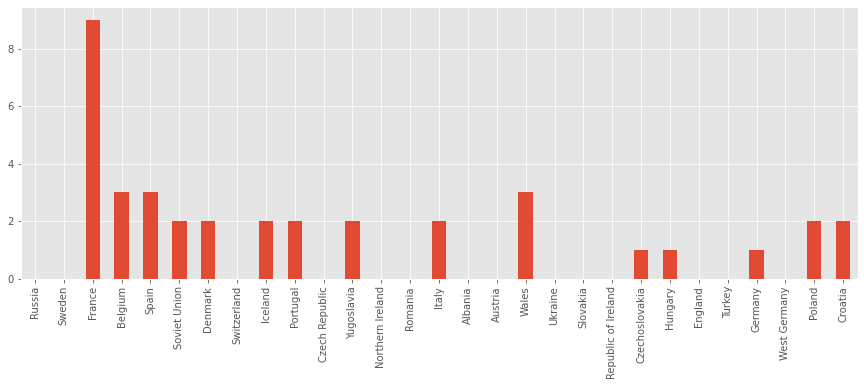

In [8]:
resultAllTeamFranceHost['Won'].plot(kind='bar')

We can clearly see that the total wins of France far exceeded the other teams. Hence, which country is host indeed does affect the final results.

Another feature we need to look at is (Home/Away)5LastGames.

<AxesSubplot:title={'center':'Home5LastGame == Good'}>

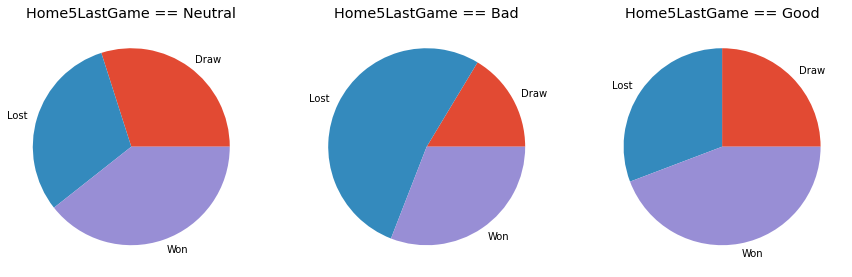

In [9]:
dfResultLast5Games = df[['Result', 'Home5LastGames']]
# count and plot
fig, axes = plt.subplots(nrows=1, ncols=3)
NeutralDf = dfResultLast5Games[dfResultLast5Games['Home5LastGames'] == 'Neutral']
NeutralDf.value_counts('Result').sort_index().plot(kind='pie', title='Home5LastGame == Neutral', ax=axes[0], label='')
BadDf = dfResultLast5Games[dfResultLast5Games['Home5LastGames'] == 'Bad']
BadDf.value_counts('Result').sort_index().plot(kind='pie', title='Home5LastGame == Bad',  ax=axes[1], label='')
GoodDf = dfResultLast5Games[dfResultLast5Games['Home5LastGames'] == 'Good']
GoodDf.value_counts('Result').sort_index().plot(kind='pie', title='Home5LastGame == Good',  ax=axes[2], label='')

When Home5LastGame was Bad, the percentage of Lost was more than 50%, which indicates a strong relation between this feature and the final results. For Good and Neutral, the effects were not really obvious, but the winrate in Good was slightly higher compared to that in Neutral.

Finally, let us examine the average number of goals feature.

<AxesSubplot:title={'center':'Mid - Mid'}>

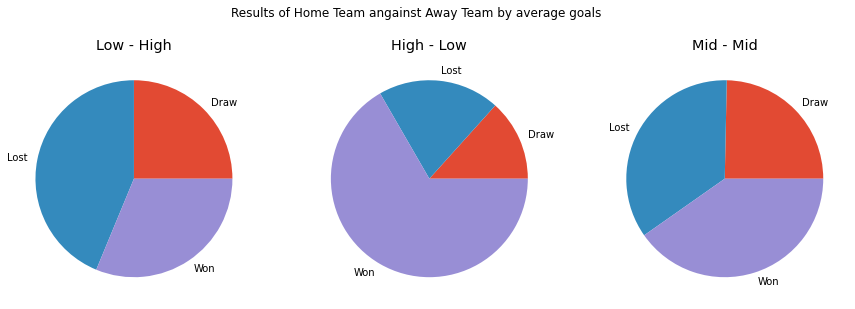

In [10]:
homeLow = df['HomeAverageGoals'] == 'Low'
homeHigh = df['HomeAverageGoals'] == 'High'
awayLow = df['AwayAverageGoals'] == 'Low'
awayHigh = df['AwayAverageGoals'] == 'High'
homeMid = df['HomeAverageGoals'] == 'Mid'
awayMid = df['HomeAverageGoals'] == 'Mid'


fig2, axes2 = plt.subplots(nrows=1, ncols=3)
fig2.suptitle('Results of Home Team angainst Away Team by average goals')
df[homeLow & awayHigh]['Result'].value_counts().sort_index().plot(kind='pie', ax=axes2[0], title='Low - High', label='')
df[homeHigh & awayLow]['Result'].value_counts().sort_index().plot(kind='pie', ax=axes2[1], title='High - Low', label='')
df[homeMid & awayMid]['Result'].value_counts().sort_index().plot(kind='pie', ax=axes2[2], title='Mid - Mid', label='')

There are six other cases (e.g. Neutral - Low and High - High), but those three are the most significant ones to consider.

We can clearly see that when the average goals of HomeTeam is Low and that of AwayTeam is High, most of the times this would be a loss for HomeTeam. On the other hand, in the High - Low chart, the opposite happened. About 3/4 of total games were wins for HomeTeam.

In Mid - Mid, the percentage of Lost appears to equal to percentage of Won, which is expected.

## Conclusion

We are certain that our data features are completely relevant and reasonable.

At the next step, we will propose some Bayesian models (exercise 5c) and try to use the pgmpy package to train our computer and let it predict the results.